### Benchmarking Dataset:

#### PXD010981 (“iPRG2015 dataset”)

PXD010981 (“iPRG2015 dataset”) contains raw data for the iPRG2015 benchmarking dataset. This dataset is composed of 4 samples with 200ng of tryptic digests of S. cerevisiae (ATCC strain 204508/S288c) were then spiked with different quantities of six individual protein digests of Ovalbumin, Myoglobin, Phosphorylase b, Beta-Galactosidase, Bovine Serum Albumin and Carbonic Anhydrase according to a schema in that publication (present in the benchmarking github repository).

In [1]:
%load_ext rpy2.ipython

D:\need_softwares\anaconda\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [10]:
%%R

library(dplyr)
library(VennDiagram)

setwd('D:/dataset/R downstream analysis/pquant/data/PXD010981-benchmark')

data_msstats <- read.csv('MSstats_output.csv')
data_proteus <- read.csv('Proteus_output.csv')

In [26]:
%%R

### msstats
data_msstats$log2FC <- as.numeric(data_msstats$log2FC)
msstats_fc <-subset(data_msstats, log2FC <= -2 | log2FC >= 2)
msstats_p <- subset(data_msstats, pvalue <= 0.01)
msstats_adj.p <-subset(data_msstats, adj.pvalue <= 0.01)
msstats_intersection <-subset(msstats_fc, pvalue <= 0.01 & adj.pvalue <= 0.01)

### proteus
data_proteus$log2FC <- as.numeric(data_proteus$logFC)
proteus_fc <-subset(data_proteus, logFC <= -2 | logFC >= 2)
proteus_p <- subset(data_proteus, P.Value <= 0.01)
proteus_adj.p <-subset(data_proteus, adj.P.Val <= 0.01)
proteus_intersection <-subset(proteus_fc, P.Value <= 0.01 & adj.P.Val <= 0.01)

interact_msstats <- msstats_intersection[,1]
interact_proteus <- proteus_intersection[,1]

In [27]:
%%R

print(interact_msstats)

 [1] "sp|P40449|YIQ1_YEAST" "sp|P44015|VAC2_YEAST" "sp|P44015|VAC2_YEAST"
 [4] "sp|P44015|VAC2_YEAST" "sp|P44015|VAC2_YEAST" "sp|P44374|SFG2_YEAST"
 [7] "sp|P44374|SFG2_YEAST" "sp|P44374|SFG2_YEAST" "sp|P44374|SFG2_YEAST"
[10] "sp|P44374|SFG2_YEAST" "sp|P44683|PGA4_YEAST" "sp|P44683|PGA4_YEAST"
[13] "sp|P44683|PGA4_YEAST" "sp|P44683|PGA4_YEAST" "sp|P44683|PGA4_YEAST"
[16] "sp|P44983|UTR6_YEAST" "sp|P44983|UTR6_YEAST" "sp|P44983|UTR6_YEAST"
[19] "sp|P44983|UTR6_YEAST" "sp|P44983|UTR6_YEAST" "sp|P55249|ZRT4_YEAST"
[22] "sp|P55249|ZRT4_YEAST" "sp|P55249|ZRT4_YEAST" "sp|P55752|ISCB_YEAST"
[25] "sp|P55752|ISCB_YEAST"


In [28]:
%%R

print(interact_proteus)

 [1] "sp|P44015|VAC2_YEAST" "sp|P44374|SFG2_YEAST" "sp|P44983|UTR6_YEAST"
 [4] "sp|P42943|TCPH_YEAST" "sp|P44374|SFG2_YEAST" "sp|P44683|PGA4_YEAST"
 [7] "sp|Q12205|MNL2_YEAST" "sp|P44015|VAC2_YEAST" "sp|P55249|ZRT4_YEAST"
[10] "sp|P42943|TCPH_YEAST" "sp|P44683|PGA4_YEAST" "sp|P55249|ZRT4_YEAST"
[13] "sp|P55752|ISCB_YEAST" "sp|Q12205|MNL2_YEAST"


INFO [2021-11-26 16:35:41] $x
INFO [2021-11-26 16:35:41] list(interact_msstats, interact_proteus)
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $category.names
INFO [2021-11-26 16:35:41] c("MSstats", "Proteus")
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $force.unique
INFO [2021-11-26 16:35:41] [1] FALSE
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $imagetype
INFO [2021-11-26 16:35:41] [1] "svg"
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $filename
INFO [2021-11-26 16:35:41] NULL
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $margin
INFO [2021-11-26 16:35:41] [1] 0.09
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $fill
INFO [2021-11-26 16:35:41] c("red", "green")
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $alpha
INFO [2021-11-26 16:35:41] c(0.5, 0.5)
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $cex
INFO [2021-11-26 16:35:41] [1] 1.8
INFO [2021-11-26 16:35:41] 
INFO [2021-11-26 16:35:41] $cat.cex
INFO [202

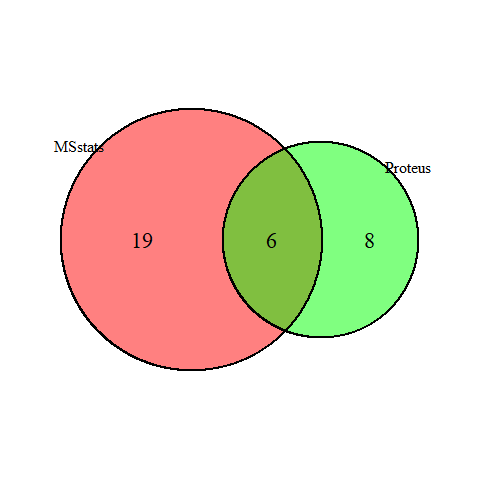

In [24]:
%%R

# msstats-proteus venn
venn.plot <- VennDiagram::venn.diagram(
  x = list(interact_msstats, interact_proteus),
  category.names = c("MSstats", "Proteus"),
  force.unique = FALSE,
  imagetype = "svg",
  filename = NULL,
  margin = 0.09,
  fill=c("red","green"), alpha=c(0.5,0.5), cex=1.8, cat.cex = 1.3,
  disable.logging = TRUE
)

grid.draw(venn.plot)